#### Topological Sorting

Topological sorting for Directed Acyclic Graph (DAG) is a linear ordering of vertices such that for every directed edge u-v, vertex u comes before v in the ordering.

Note: Topological Sorting for a graph is not possible if the graph is not a DAG.

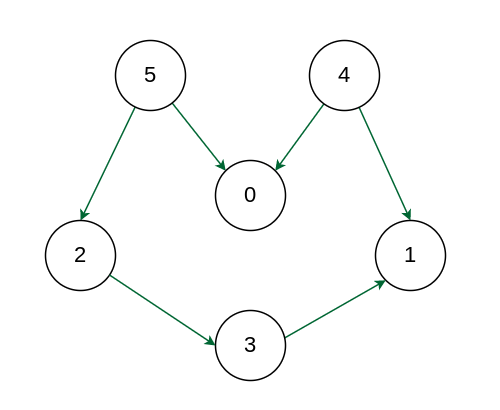

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/example.png")

Output: 5 4 2 3 1 0

Explanation: The first vertex in topological sorting is always a vertex with an in-degree of 0 (a vertex with no incoming edges).  A topological sorting of the following graph is “5 4 2 3 1 0”. There can be more than one topological sorting for a graph. Another topological sorting of the following graph is “4 5 2 3 1 0”.

#### Topological Sorting vs Depth First Traversal (DFS): 

In DFS, we print a vertex and then recursively call DFS for its adjacent vertices. In topological sorting, we need to print a vertex before its adjacent vertices. 

For example, In the above given graph, the vertex ‘5’ should be printed before vertex ‘0’, but unlike DFS, the vertex ‘4’ should also be printed before vertex ‘0’. So Topological sorting is different from DFS. For example, a DFS of the shown graph is “5 2 3 1 0 4”, but it is not a topological sorting.

#### Topological Sorting in Directed Acyclic Graphs (DAGs)

DAGs are a special type of graphs in which each edge is directed such that no cycle exists in the graph, before understanding why Topological sort only exists for DAGs, lets first answer two questions:

#### Why Topological Sort is not possible for graphs with undirected edges?

This is due to the fact that undirected edge between two vertices u and v means, there is an edge from u to v as well as from v to u. Because of this both the nodes u and v depend upon each other and none of them can appear before the other in the topological ordering without creating a contradiction.

#### Why Topological Sort is not possible for graphs having cycles?


Imagine a graph with 3 vertices and edges = {1 to 2 , 2 to 3, 3 to 1} forming a cycle. Now if we try to topologically sort this graph starting from any vertex, it will always create a contradiction to our definition. All the vertices in a cycle are indirectly dependent on each other hence topological sorting fails.

Hence, a Directed Acyclic Graph removes the contradiction created by above two questions, hence it is suitable for topological ordering. A DFS based solution to find a topological sort has already been discussed.

#### Topological order may not be Unique:

Topological sorting is a dependency problem in which completion of one task depends upon the completion of several other tasks whose order can vary. Let us understand this concept via an example:

Suppose our task is to reach our School and in order to reach there, first we need to get dressed. The dependencies to wear clothes is shown in the below dependency graph. For example you can not wear shoes before wearing socks.

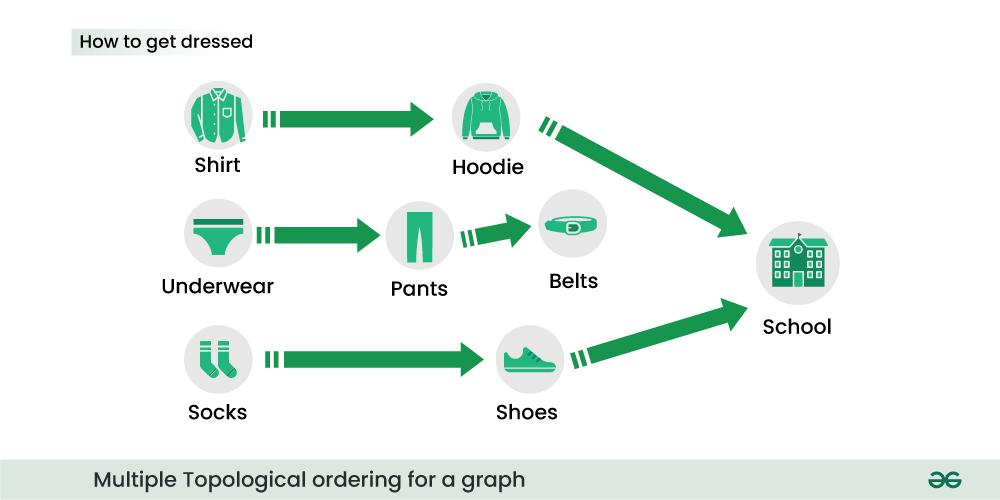

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/1.jpg")

From the above image you would have already realized that there exist multiple ways to get dressed, the below image shows some of those ways.



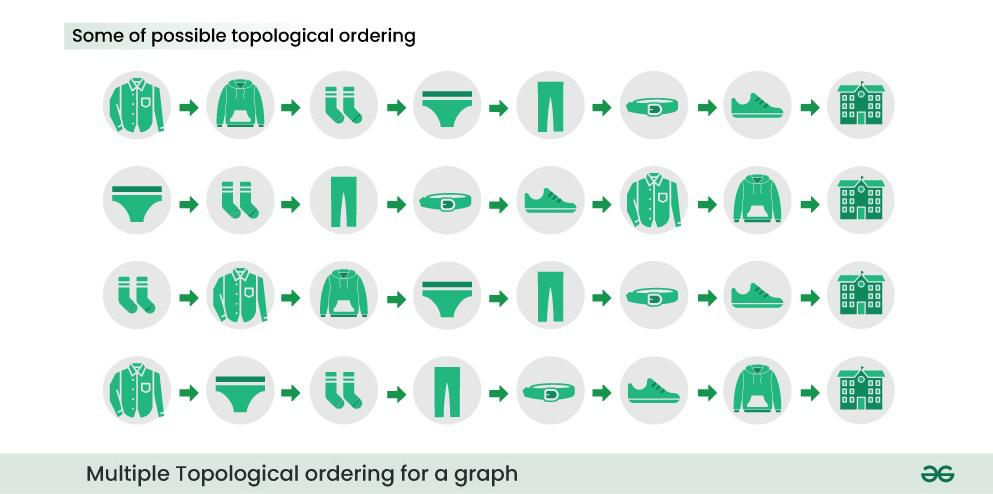

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/2.jpg")

Can you list all the possible topological ordering of getting dressed for above dependency graph?

#### Algorithm for Topological Sorting using DFS:

Here’s a step-by-step algorithm for topological sorting using Depth First Search (DFS):

1. Create a graph with n vertices and m-directed edges.
2. Initialize a stack and a visited array of size n.
3. For each unvisited vertex in the graph, do the following:

    - Call the DFS function with the vertex as the parameter.
    - In the DFS function, mark the vertex as visited and recursively call the DFS function for all unvisited neighbors of the vertex.
    - Once all the neighbors have been visited, push the vertex onto the stack.
4. After all, vertices have been visited, pop elements from the stack and append them to the output list until the stack is empty.
5. The resulting list is the topologically sorted order of the graph.

#### Illustration Topological Sorting Algorithm:

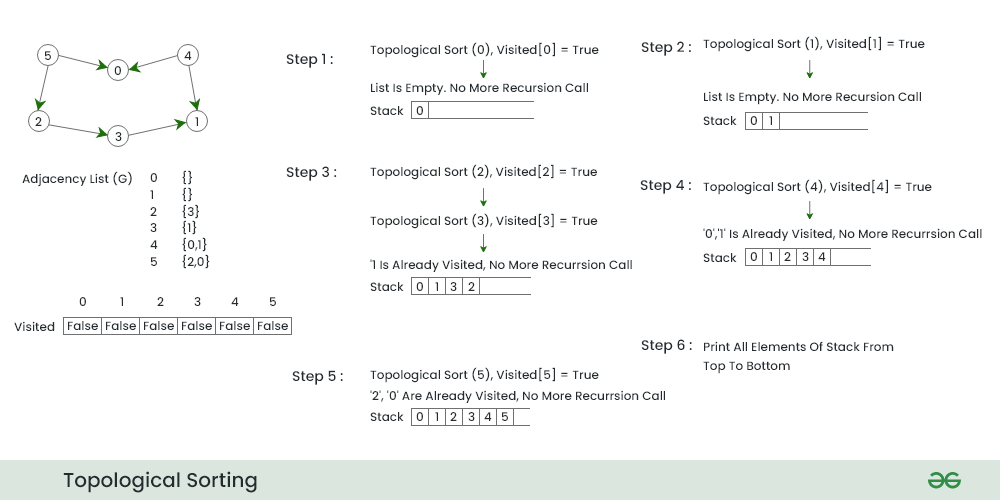

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/Topological-sorting.png")

Step 1:

- We start DFS from node 0 because it has zero incoming Nodes
- We push node 0 in the stack and move to next node having minimum number of adjacent nodes i.e. node 1.

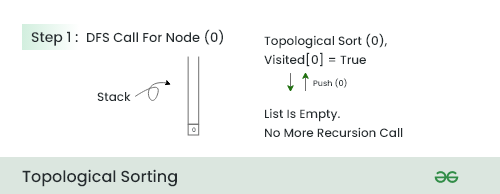

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/file.png")

Step 2:

- In this step , because there is no adjacent of this node so push the node 1 in the stack and move to next node.

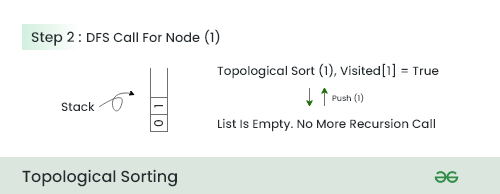

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/file1.png")

Step 3:

- In this step , We choose node 2 because it has minimum number of adjacent nodes after 0 and 1 .
- We call DFS for node 2 and push all the nodes which comes in traversal from node 2 in reverse order.
- So push 3 then push 2 .

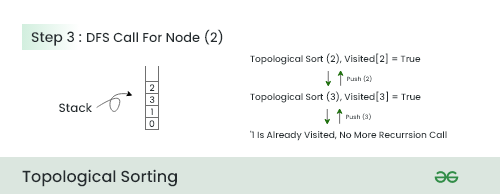

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/file2.png")

Step 4:

- We now call DFS for node 4
- Because 0 and 1 already present in the stack so we just push node 4 in the stack and return.

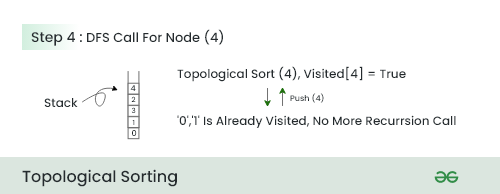

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/file3.png")

Step 5:

- In this step because all the adjacent nodes of 5 is already in the stack we push node 5 in the stack and return.

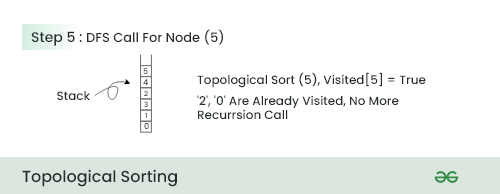

In [9]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/file4.png")

Step 6: 

- This is the final step of the Topological sorting in which we pop all the element from the stack and print it in that order .

#### Topological sort:

In [10]:
def topologicalSortUtil(v, adj, visited, stack):
    visited[v] = True
    for i in adj[v]:
        if not visited[i]:
            topologicalSortUtil(i, adj, visited, stack)
            
    stack.append(v)

def topologicalSort(adj, V):
    stack = []
    visited = [False] * V
    for i in range(V):
        if not visited[i]:
            topologicalSortUtil(i, adj, visited, stack)

    print("Topological sorting of the graph:", end=" ")
    while stack:
        print(stack.pop(), end=" ")

if __name__ == "__main__":
    V = 4
    edges = [[0, 1], [1, 2], [3, 1], [3, 2]]
    adj = [[] for _ in range(V)]
    for i in edges:
        adj[i[0]].append(i[1])

    topologicalSort(adj, V)


Topological sorting of the graph: 3 0 1 2 

#### Time Complexity: O(V+E). 

The above algorithm is simply DFS with an extra stack. So time complexity is the same as DFS

#### Auxiliary space: O(V). 

The extra space is needed for the stack

#### Topological Sorting Using BFS:

In [11]:
from collections import defaultdict
class Graph:
    def __init__(self, vertices):
        self.V = vertices  
        self.adj = defaultdict(list)  

    def addEdge(self, u, v):
        self.adj[u].append(v)

    def topologicalSort(self):
        in_degree = [0] * self.V
        for i in range(self.V):
            for j in self.adj[i]:
                in_degree[j] += 1

        q = []
        for i in range(self.V):
            if in_degree[i] == 0:
                q.append(i)
                
        count = 0
        top_order = []
        while q:
            u = q.pop(0)
            top_order.append(u)
            for node in self.adj[u]:
                in_degree[node] -= 1
                if in_degree[node] == 0:
                    q.append(node)

            count += 1

        if count != self.V:
            print("Graph contains cycle")
            return

        print("Topological Sort:", top_order)

if __name__ == "__main__":
    g = Graph(6)
    g.addEdge(5, 2)
    g.addEdge(5, 0)
    g.addEdge(4, 0)
    g.addEdge(4, 1)
    g.addEdge(2, 3)
    g.addEdge(3, 1)

    print("Following is a Topological Sort of the given graph")
    g.topologicalSort()


Following is a Topological Sort of the given graph
Topological Sort: [4, 5, 2, 0, 3, 1]


#### Time Complexity:

The time complexity for constructing the graph is O(V + E), where V is the number of vertices and E is the number of edges.

The time complexity for performing topological sorting using BFS is also O(V + E), where V is the number of vertices and E is the number of edges. This is because each vertex and each edge is visited once during the BFS traversal.

#### Space Complexity:

The space complexity for storing the graph using an adjacency list is O(V + E), where V is the number of vertices and E is the number of edges.

Additional space is used for storing the in-degree of vertices, which requires O(V) space.

A queue is used for BFS traversal, which can contain at most V vertices. Thus, the space complexity for the queue is O(V).

Overall, the space complexity of the algorithm is O(V + E) due to the storage of the graph, in-degree array, and the queue.

In summary, the time complexity of the provided implementation is O(V + E), and the space complexity is also O(V + E).

Note: Here, we can also use a array instead of the stack. If the array is used then print the elements in reverse order to get the topological sorting.

#### Advantages of Topological Sort:
- Helps in scheduling tasks or events based on dependencies.
- Detects cycles in a directed graph.
- Efficient for solving problems with precedence constraints.

#### Disadvantages of Topological Sort:
- Only applicable to directed acyclic graphs (DAGs), not suitable for cyclic graphs.
- May not be unique, multiple valid topological orderings can exist.
- Inefficient for large graphs with many nodes and edges.

#### Applications of Topological Sort:
- Task scheduling and project management.
- Dependency resolution in package management systems.
- Determining the order of compilation in software build systems.
- Deadlock detection in operating systems.
- Course scheduling in universities.